In [1]:
# Data management
# ------------------------------------------------------------------------------
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd

# Graphics
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt

# Preprocessing and modelling
# evaluate bagging ensemble for regression
# ------------------------------------------------------------------------------
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold






# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [2]:
# Data Loading


#training data
data_train = pd.read_excel("housing.xlsx", sheet_name='Hoja1')
data_train.head()



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2310.0,0,0.538,65750,65.2,40900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7070.0,0,0.469,64210,78.9,49671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7070.0,0,0.469,71850,61.1,49671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2180.0,0,0.458,69980,45.8,60622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2180.0,0,0.458,71470,54.2,60622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    int64  
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    int64  
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [20]:
# Configuring train and test datasets
# ------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
                                        data_train.drop(columns = "MEDV"),
                                        data_train['MEDV'],
                                        random_state = 123
                                    )


In [21]:
# Model creation
# ==============================================================================
rf = RandomForestRegressor(
            n_estimators = 10,  # number of trees
            criterion    = 'mse',
            max_depth    = None,
            #max_features = 'auto',
            max_features = 4,
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
rf.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', max_features=4, n_estimators=10,
                      n_jobs=-1, random_state=123)

In [22]:


# randomforest ensemble for making predictions for regression

# Model training error
#-------------------------------------------------------------------------------
prediction_train = rf.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train


rmse = mean_squared_error(
        y_true  = y_train,
        y_pred  = prediction_train,
        squared = False
       )
print(f"RMSE in train: {rmse}")

R2 Value in training: 0.97
Accuracy in training 95.18
RMSE in train: 1.4753660607430998


In [23]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = rf.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediction_test,
        squared = False
       )
print(f"RMSE in test: {rmse}")

Accuracy in test 88.34
RMSE in test: 3.804514723780757


In [24]:
#we will evaluate the model using repeated k-fold cross-validation, with three repeats and 10 folds. 
# We will report the mean absolute error (MAE) of the model across all repeats and folds. 
#The scikit-learn library makes the MAE negative so that it is maximized instead of minimized. 
#This means that larger negative MAE are better and a perfect model has a MAE of 0.


# define the model
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 4, random_state = 42)
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))



MAE: -2.657 (0.492)


In [25]:
# define the model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# fit the model on the whole dataset
rf.fit(X_train, y_train)
# make a single prediction

yhat = rf.predict(X_train)
print('Prediction: %d' % yhat[0])

Prediction: 20


In [26]:
from sklearn import metrics

# bagging ensemble for making predictions for regression

# Model training error
#-------------------------------------------------------------------------------
prediction_train = rf.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train

R2 Value in training: 0.98
Accuracy in training 95.65


In [27]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = rf.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

Accuracy in test 88.76


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

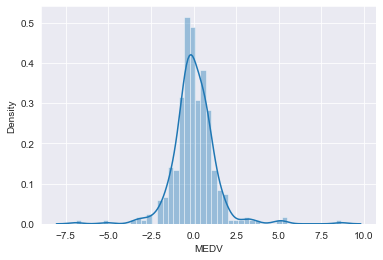

In [28]:
# Error in training
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(y_train-prediction_train)

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

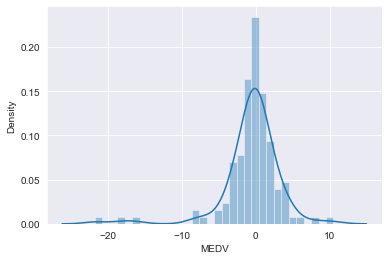

In [29]:
# Error in test

sns.set_style('darkgrid')
sns.distplot(y_test-prediction_test)

Optimum value of max_features: 5


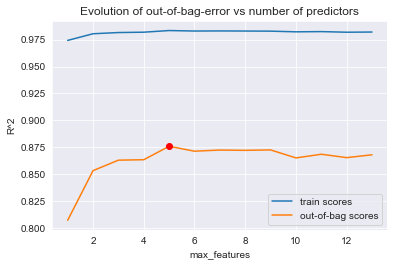

In [30]:
# Defining number of features to use based on Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Values to test for number of features
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Loop for training a model for each value in max_features. It is obtained training error
# and Out-of-Bag.
for max_features in max_features_range:
    model = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'mse',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    oob_scores.append(model.oob_score_)
    
# Graphic with the evolution of errors
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, oob_scores, label="out-of-bag scores")
ax.plot(max_features_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red")
ax.set_ylabel("R^2")
ax.set_xlabel("max_features")
ax.set_title("Evolution of out-of-bag-error vs number of predictors")
plt.legend();
print(f"Optimum value of max_features: {max_features_range[np.argmax(oob_scores)]}")

Optimum value of number of trees: 111


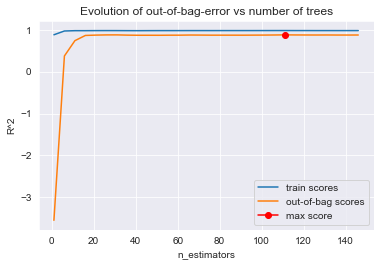

In [31]:
# Once  the number of estimators is know, the number of trees is found using Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for n_estimators in estimator_range:
    model1 = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 5,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    model1.fit(X_train, y_train)
    train_scores.append(model1.score(X_train, y_train))
    oob_scores.append(model1.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, oob_scores, label="out-of-bag scores")
ax.plot(estimator_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_estimators")
ax.set_title("Evolution of out-of-bag-error vs number of trees")
plt.legend();
print(f"Optimum value of number of trees: {estimator_range[np.argmax(oob_scores)]}")

Optimum value of minimum number of observations in leaves : 1


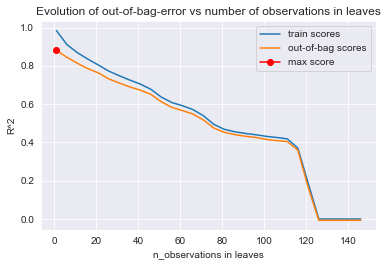

In [32]:
# Fitting the minimum number of observations in the leeaves of the trees using Out-of-Bag error
# ==============================================================================
train_scores = []
oob_scores   = []

# Valores evaluados
obser_range = range(1, 150, 5)

# loop for training a model for each value in estimator_range 
# The training error and the Out-of-Bag are obtained.
for observ in obser_range:
    model1 = RandomForestRegressor(
                n_estimators = 111,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 5,
                min_samples_leaf = observ,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    model1.fit(X_train, y_train)
    train_scores.append(model1.score(X_train, y_train))
    oob_scores.append(model1.oob_score_)
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(obser_range, train_scores, label="train scores")
ax.plot(obser_range, oob_scores, label="out-of-bag scores")
ax.plot(obser_range[np.argmax(oob_scores)], max(oob_scores),
        marker='o', color = "red", label="max score")
ax.set_ylabel("R^2")
ax.set_xlabel("n_observations in leaves")
ax.set_title("Evolution of out-of-bag-error vs number of observations in leaves")
plt.legend();
print(f"Optimum value of minimum number of observations in leaves : {obser_range[np.argmax(oob_scores)]}")

Optimum value of predictors using cv: 2


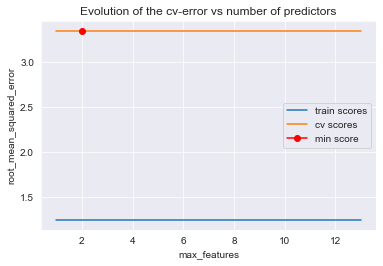

In [33]:
# Validation of number of predictors using k-cross-validation and neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train.shape[1] + 1, 1)

# Loop for training a model for each value in max_features
# Training error and k-cross-validation error are obtained.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'neg_root_mean_squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Train error
    model.fit(X_train, y_train)
    predictions = model.predict(X = X_train)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predictions,
            squared = False
           )
    train_scores.append(rmse)
    
    # kcross-validation error
    scores = cross_val_score(
                estimator = model,
                X         = X_train,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # adding scores of cross_val_score() and sign change
    cv_scores.append(-1*scores.mean())
    
# Graphic with the evolution of the errors
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolution of the cv-error vs number of predictors")
plt.legend();
print(f"Optimum value of predictors using cv: {max_features_range[np.argmin(cv_scores)]}")

In [34]:

from sklearn.model_selection import ParameterGrid

# Grid of hyperparameters
# ==============================================================================
param_grid = ParameterGrid(
                {'n_estimators': [150],
                 'max_features': [5, 7, 9],
                 'max_depth'   : [None, 3, 10, 20]
                }
             )

# Loop for fittying a model for each combination of values
# ==============================================================================
results = {'params': [], 'oob_r2': []}

for params in param_grid:
    
    model = RandomForestRegressor(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    model.fit(X_train, y_train)
    
    results['params'].append(params)
    results['oob_r2'].append(model.oob_score_)
    print(f"Model: {params} \u2713")

# Resultados
# ==============================================================================
results = pd.DataFrame(results)
results = pd.concat([results, results['params'].apply(pd.Series)], axis=1)
results = results.drop(columns = 'params')
results = results.sort_values('oob_r2', ascending=False)
results

Model: {'max_depth': None, 'max_features': 5, 'n_estimators': 150} ✓
Model: {'max_depth': None, 'max_features': 7, 'n_estimators': 150} ✓
Model: {'max_depth': None, 'max_features': 9, 'n_estimators': 150} ✓
Model: {'max_depth': 3, 'max_features': 5, 'n_estimators': 150} ✓
Model: {'max_depth': 3, 'max_features': 7, 'n_estimators': 150} ✓
Model: {'max_depth': 3, 'max_features': 9, 'n_estimators': 150} ✓
Model: {'max_depth': 10, 'max_features': 5, 'n_estimators': 150} ✓
Model: {'max_depth': 10, 'max_features': 7, 'n_estimators': 150} ✓
Model: {'max_depth': 10, 'max_features': 9, 'n_estimators': 150} ✓
Model: {'max_depth': 20, 'max_features': 5, 'n_estimators': 150} ✓
Model: {'max_depth': 20, 'max_features': 7, 'n_estimators': 150} ✓
Model: {'max_depth': 20, 'max_features': 9, 'n_estimators': 150} ✓


,oob_r2,max_depth,max_features,n_estimators
9,0.876157,20.0,5.0,150.0
0,0.876068,NaN,5.0,150.0
2,0.873172,NaN,9.0,150.0
11,0.872784,20.0,9.0,150.0
6,0.872565,10.0,5.0,150.0
7,0.872267,10.0,7.0,150.0
8,0.871339,10.0,9.0,150.0
1,0.871165,NaN,7.0,150.0
10,0.870980,20.0,7.0,150.0
5,0.811542,3.0,9.0,150.0


In [36]:
# Model creation
# ==============================================================================
rf_final = RandomForestRegressor(
            n_estimators = 150,  # number of trees
            criterion    = 'mse',
            max_depth    = 20,
            #max_features = 'auto',
            max_features = 5,
            oob_score    = True,
            n_jobs       = -1,
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
rf_final.fit(X_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=20, max_features=5,
                      n_estimators=150, n_jobs=-1, oob_score=True,
                      random_state=123)

In [37]:


# randomforest ensemble for making predictions for regression

# Model training error
#-------------------------------------------------------------------------------
prediction_train = rf_final.predict(X = X_train)


#Measuring Goodness of fit in Training data

print('R2 Value in training:', round(metrics.r2_score(y_train, prediction_train),2))

#Measuring accuracy on Testing Data
print('Accuracy in training',round( 100- (np.mean(np.abs((y_train - prediction_train) / y_train)) * 100), 2))
      
 
residuals_train=y_train - prediction_train


rmse = mean_squared_error(
        y_true  = y_train,
        y_pred  = prediction_train,
        squared = False
       )
print(f"RMSE in train: {rmse}")

R2 Value in training: 0.98
Accuracy in training 95.74
RMSE in train: 1.2151653989268618


In [38]:
# Model test error
#-------------------------------------------------------------------------------
prediction_test = rf_final.predict(X = X_test)


#Measuring accuracy on Testing Data
print('Accuracy in test',round( 100- (np.mean(np.abs((y_test - prediction_test) / y_test)) * 100), 2))
      
 
residuals_testn=y_test - prediction_test

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = prediction_test,
        squared = False
       )
print(f"RMSE in test: {rmse}")

Accuracy in test 89.89
RMSE in test: 3.4142415635129937


In [39]:
importance_predictors = pd.DataFrame(
                            {'predictor': data_train.drop(columns = "MEDV").columns,
                             'importance': rf_final.feature_importances_}
                            )
print("Importance of the model predictors")
print("-------------------------------------------")
importance_predictors.sort_values('importance', ascending=False)

Importance of the model predictors
-------------------------------------------


,predictor,importance
5,RM,0.370693
12,LSTAT,0.263202
4,NOX,0.068512
10,PTRATIO,0.065528
7,DIS,0.064114
0,CRIM,0.047373
2,INDUS,0.039734
9,TAX,0.030641
6,AGE,0.022164
11,B,0.017096


In [40]:
from sklearn.inspection import permutation_importance

importance_per = permutation_importance(
                estimator    = rf_final,
                X            = X_train,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importance = pd.DataFrame(
                    {k: importance_per[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importance['feature'] = X_train.columns
df_importance.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
12,4.861172,0.209669,LSTAT
5,4.803064,0.060920,RM
4,1.395572,0.082374,NOX
7,1.232462,0.060294,DIS
10,0.945909,0.056507,PTRATIO
0,0.777030,0.033282,CRIM
9,0.509330,0.015592,TAX
6,0.452252,0.022360,AGE
2,0.440455,0.030461,INDUS
11,0.324369,0.009418,B


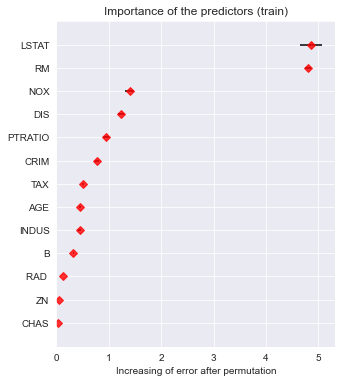

In [41]:
# Graphic
fig, ax = plt.subplots(figsize=(5, 6))
df_importance = df_importance.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importance['feature'],
    df_importance['importances_mean'],
    xerr=df_importance['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importance['importances_mean'],
    df_importance['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importance of the predictors (train)')
ax.set_xlabel('Increasing of error after permutation');

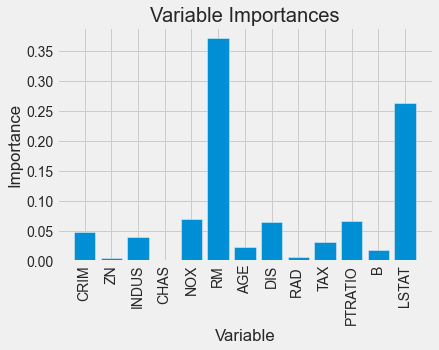

In [42]:
importances= rf_final.feature_importances_
feature_list = data_train.drop(columns = "MEDV").columns

%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

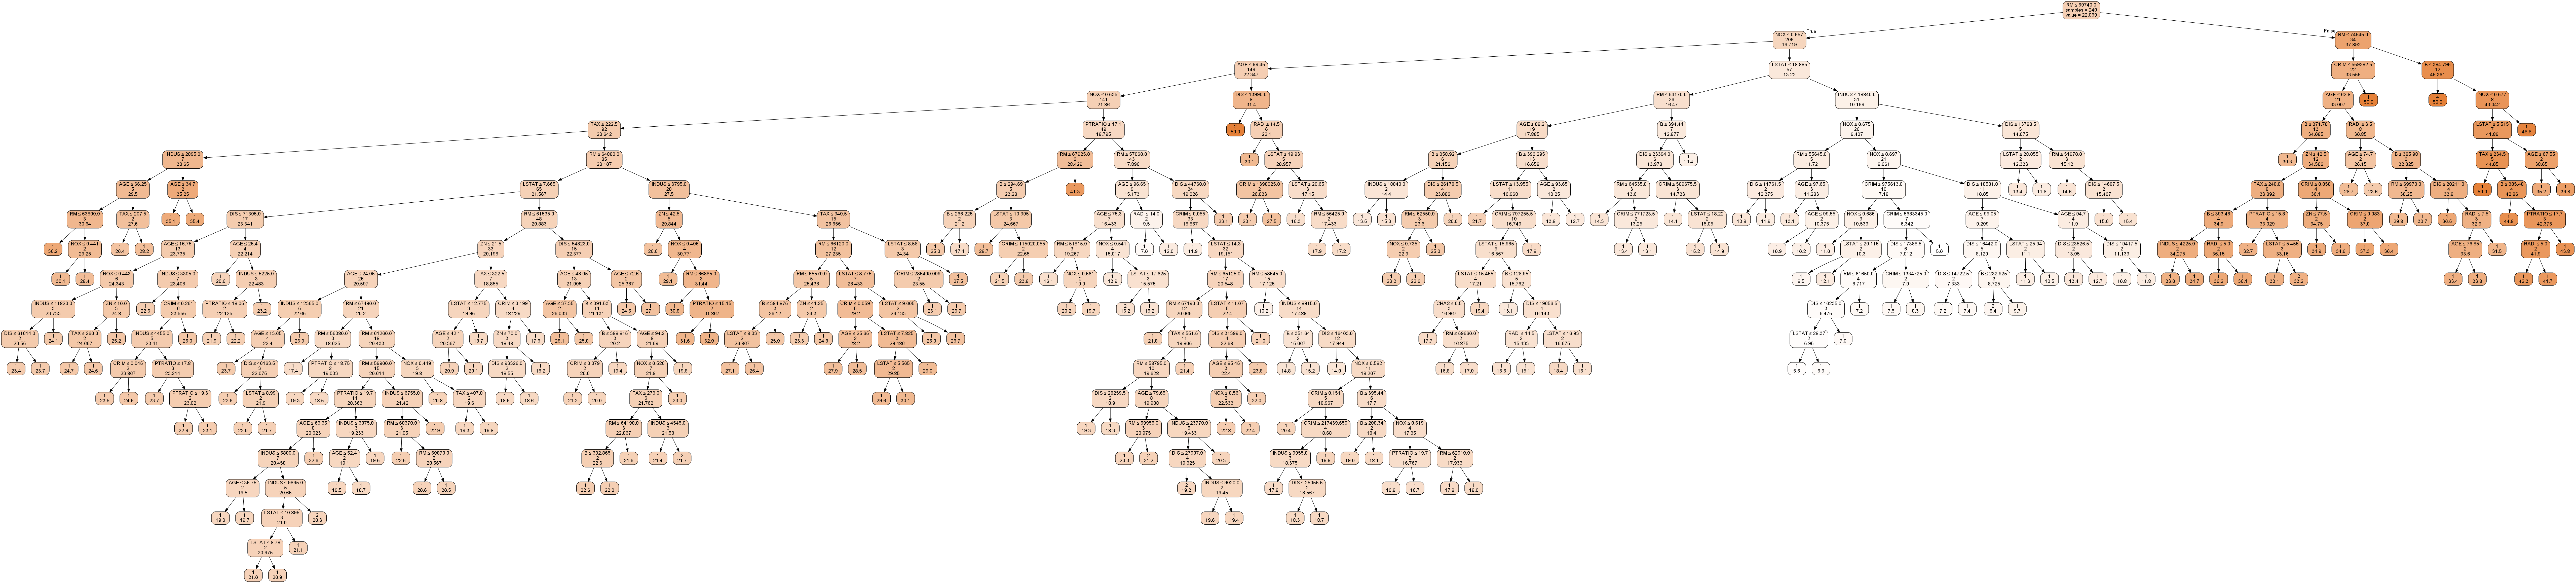

In [43]:
# Selecting any tree in the forest (Example 51)

from dmba import plotDecisionTree

plotDecisionTree(rf_final.estimators_[50], feature_names=list(data_train.drop(columns = "MEDV").columns)) 
    



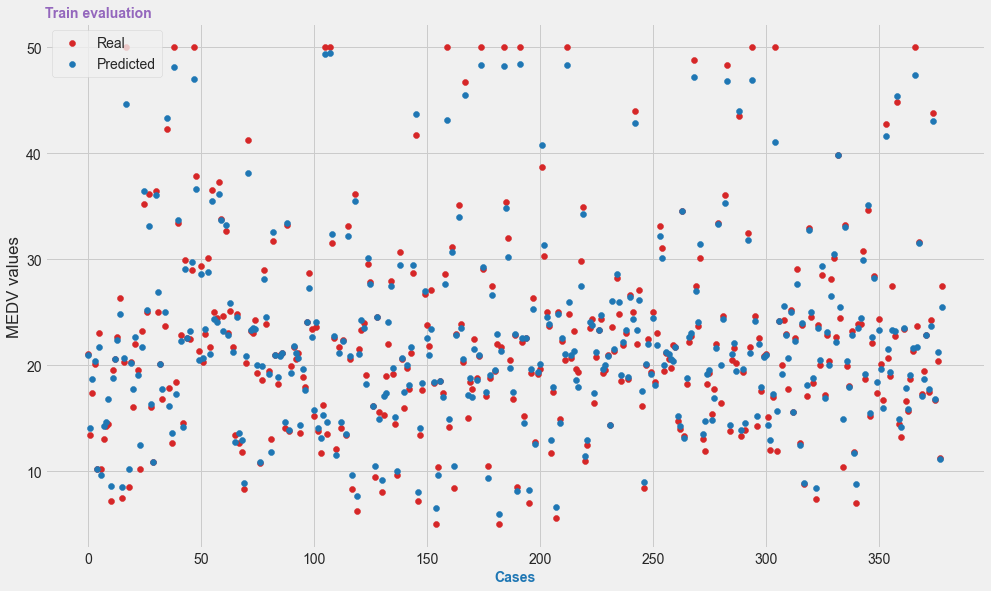

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_train)))

ax.scatter(x_axis, y_train, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Train evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

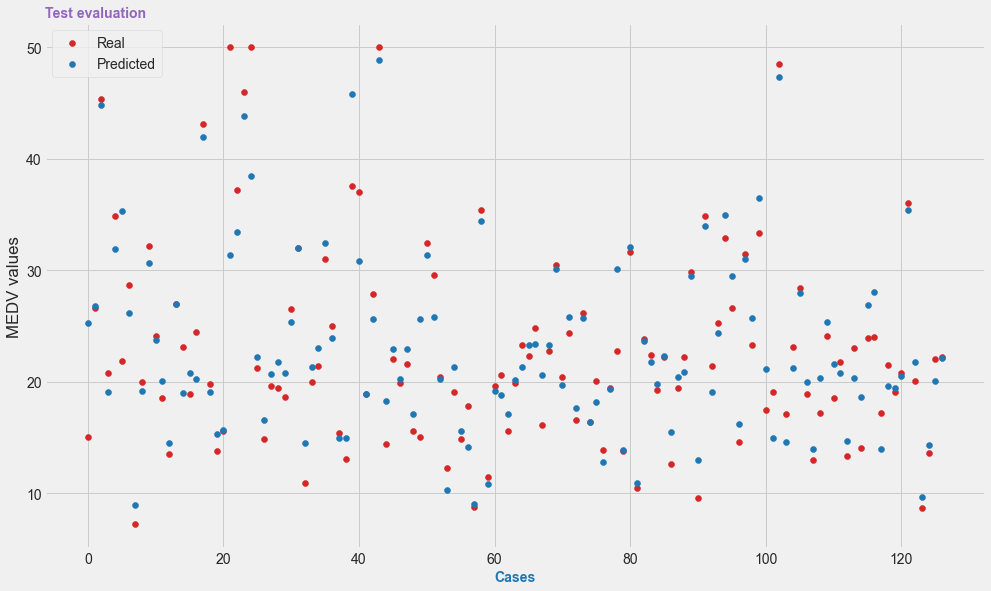

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 9))


x_axis=list(range(len(y_test)))

ax.scatter(x_axis, y_test, color = 'tab:red', label='Real')
ax.scatter(x_axis, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("Cases", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Test evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

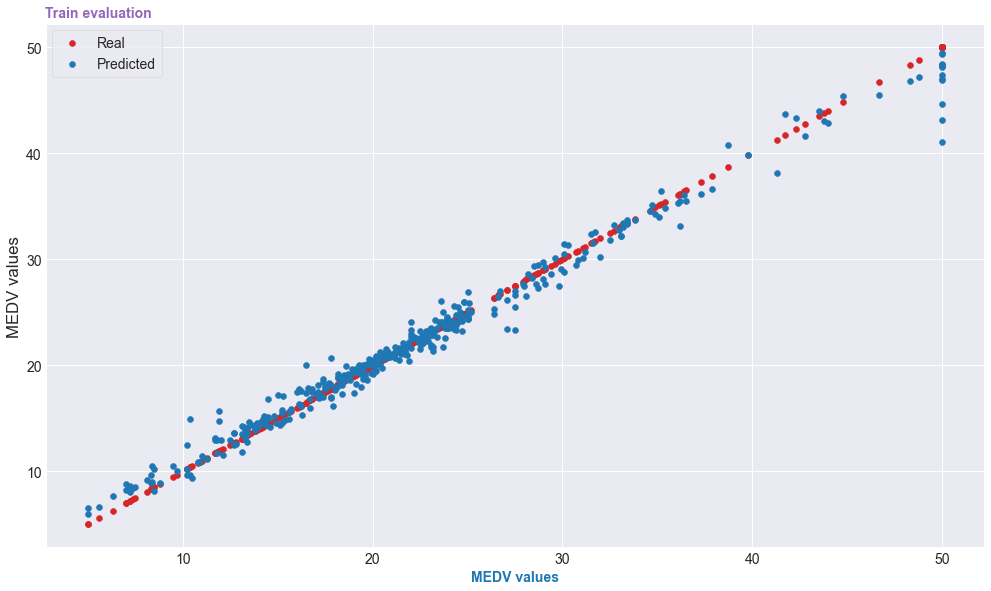

In [47]:
import matplotlib.pyplot as plt  # TRAINING

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_train, y_train, color = 'tab:red', label='Real')
ax.scatter(y_train, prediction_train, color = 'tab:blue', label='Predicted')
ax.set_xlabel("MEDV values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Train evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

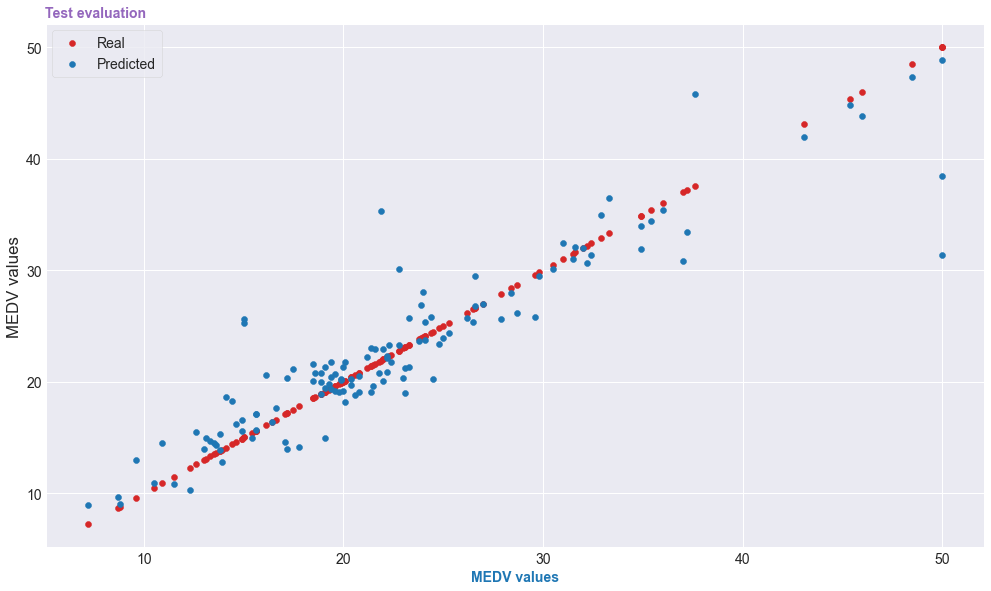

In [48]:
#######  TEST

fig, ax = plt.subplots(figsize=(15, 9))


#x_axis=list(range(len(y_train)))

ax.scatter(y_test, y_test, color = 'tab:red', label='Real')
ax.scatter(y_test, prediction_test, color = 'tab:blue', label='Predicted')
ax.set_xlabel("MEDV values", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("MEDV values")
ax.set_title('Test evaluation', loc = "left", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:purple'})
ax.legend(loc = 'upper left')
plt.show()

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

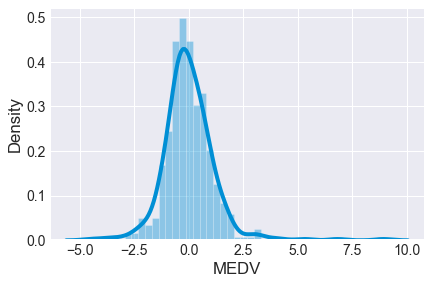

In [46]:
# Error in training
import seaborn as sns
sns.set_style('darkgrid')
sns.distplot(y_train-prediction_train)

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

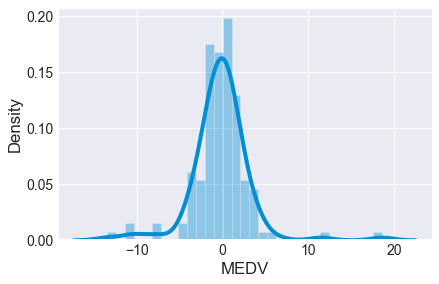

In [49]:
# Error in test

sns.set_style('darkgrid')
sns.distplot(y_test-prediction_test)